# Fit Pixel

In this notebook we will fit a single pixel in a data cube for NGC628.

#### * If you have not yet downloaded the sample data cube, uncomment the below cell and run and download the sample data cube.  
This will save a 900MB file called `sample_data.hdf5` to the **`ExampleData`** directory in the **`LUCI`** folder. Do not be concerned if it takes a few minutes to download.

In [1]:
# !wget -O Data/NGC628_SN3.hdf5  https://ws.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/data/pub/CFHT/2307000z.hdf5?RUNID=xc9le6u8llecp7fp

In [2]:
# Imports
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

# Get location of LUCI 
path = os.path.abspath(os.path.pardir)  
sys.path.insert(0, path)  # add LUCI to the available paths

from LuciBase import Luci

%config Completer.use_jedi=False  # enable autocompletion when typing in Jupyter notebooks

Set the required parameters. We will be using our machine learning algorithm to get the initial guesses - this happens under the hood in `LuciFit`, so that the user is not required to think about the initial guess

In [3]:
# Initialize paths and set parameters
Luci_path = path
cube_dir = '/media/carterrhea/carterrhea/NGC628'  # Full path to data cube
cube_name = 'NGC628_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'NGC628'
redshift = 0.000133  # Redshift of object
resolution = 1000 # The actual resolution is 400, but we don't have ML algorithms for that resolution, so use 1000

Intialize our LUCI object

In [4]:
cube = Luci(Luci_path, cube_dir + '/' + cube_name, cube_dir, object_name, redshift, resolution)

  0%|          | 0/9 [00:00<?, ?it/s]

We have added a trailing '/' to your Luci_path variable.

Please add this in the future.

Reading in data...


100%|██████████| 9/9 [00:29<00:00,  3.24s/it]


Create a deep frame

Let's extract a background region and take a look at it. The background region is defined in a ds9 region file in the `ExampleData` folder.

In [5]:
# We use 'mean = True' to take the mean of the emission in the region instead of the sum
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)

100%|██████████| 2064/2064 [00:04<00:00, 445.22it/s]


We will now fit a single pixel and take a look at the fit. This fit commands has all the same options as all the other commands except for binning :)

In [6]:
# Fit!
axis, sky, fit_dict = cube.fit_pixel(
    ['Halpha', 'NII6548', 'NII6583', 'SII6716', 'SII6731'],  # lines
    'sincgauss',   # fit function
    [1,1,1,1,1],  # velocity relationship 
    [1,1,1,1,1],  # sigma relationship
    1250, 1045,    # x & y coordinate
    bkg=bkg_sky 
)

And now we can plot the results

(15000.0, 16000.0)

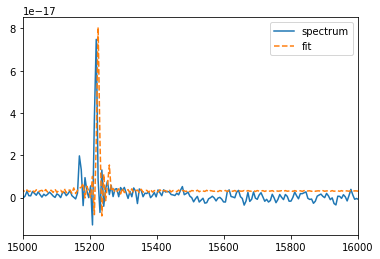

In [7]:
plt.plot(axis, sky, label='spectrum')
plt.plot(axis, fit_dict['fit_vector'], label='fit', linestyle='--')
plt.legend()
plt.xlim(15000, 16000)

And that is it! Congratulations, you have just used `LUCI`! 

In [8]:
fit_dict

{'fit_sol': array([7.72166826e-17, 1.52245726e+04, 2.06323121e+00, 3.37104320e-18,
        1.51769106e+04, 2.06323121e+00, 1.01131296e-17, 1.52589138e+04,
        2.06323121e+00, 1.92882990e-18, 1.48762408e+04, 2.06323121e+00,
        6.21337719e-21, 1.48444588e+04, 2.06323121e+00, 3.15014419e-18]),
 'fit_uncertainties': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'amplitudes': [7.721668257178447e-17,
  3.3710432007691866e-18,
  1.011312960230756e-17,
  1.9288298980891875e-18,
  6.213377194993195e-21],
 'fluxes': [1.7117602553679425e-15,
  7.473019531550791e-17,
  2.241905859465237e-16,
  4.2758821655476465e-17,
  1.3773982227365597e-19],
 'flux_errors': [0.0, 0.0, 0.0, 0.0, 0.0],
 'chi2': 126259.27377624525,
 'velocities': [252.73702512275312,
  1875.0481379281212,
  -1360.855601781309,
  252.73702514818547,
  252.73702512689158],
 'sigmas': [40.6559433068978,
  40.78362036418429,
  40.564444513298355,
  41.60791484465518,
  41.696997624068516],
 'vels_er